In [5]:
%run setup

In [32]:
from shapely.geometry import box, LineString
from shapely.ops import split
import plotly.graph_objects as go
from plotly.offline import iplot
import numpy as np

In [7]:
layout = dict(height=700, width=700)

In [60]:
lims = (0.0, 0.0, 1.0, 4.0)
x_min, y_min, x_max, y_max = lims

In [61]:
model = lambda x: 2*x + 1

In [65]:
def plotly_split_box(x_min, y_min, x_max, y_max, model):
    b = box(x_min, y_min, x_max, y_max)
    ls = LineString([(x, model(x)) for x in (x_min, x_max)])
    plot_data = []
    for poly in split(b, ls):
        x, y = zip(*list(poly.exterior.coords))
        scatter = go.Scatter(x=[], y=[], fill="toself")
        scatter.x = x
        scatter.y = y
        plot_data.append(
            scatter
        )
    return plot_data    

In [66]:
data = plotly_split_box(*lims, model)

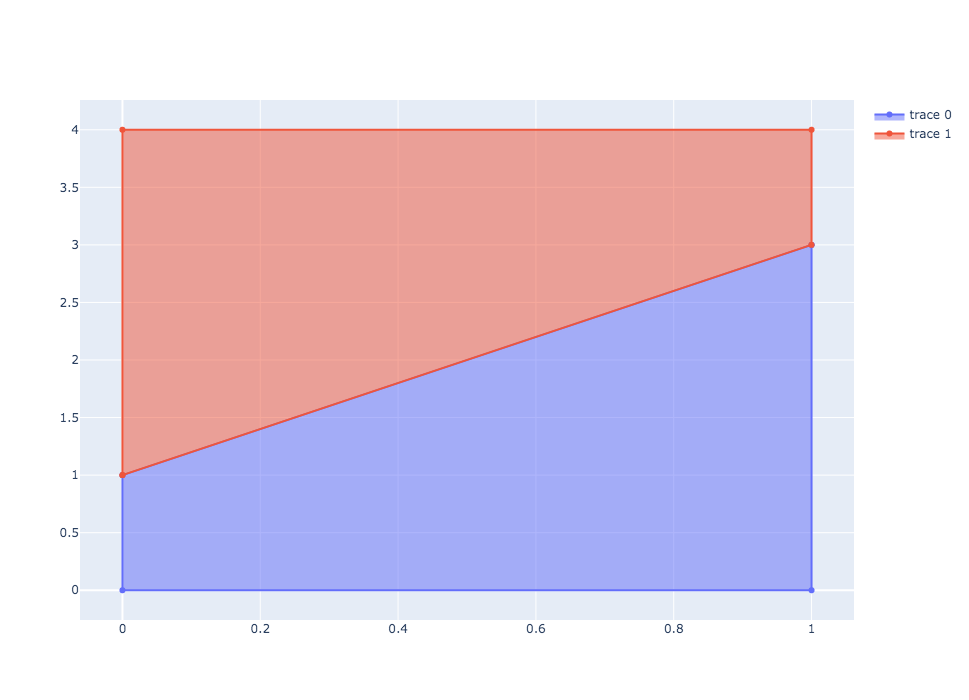

In [67]:
iplot(dict(data=data, layout=layout))